In [21]:
#Since the target variable is continuous variable the best evaluation metric would be RMSE or Root Mean Square Error.It is mostly used for regression problems.

In [22]:
#Building Bench mark model for the given data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [24]:
df['trip_duration_hour'] = df['trip_duration'].apply(lambda x: x/3600)
df.drop(columns = ['trip_duration'],inplace = True)

In [25]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format = '%Y-%m-%d %H:%M:%S')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'],format = '%Y-%m-%d %H:%M:%S')

In [26]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_date'] = df['pickup_datetime'].dt.date

df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_year'] = df['dropoff_datetime'].dt.year
df['dropoff_day'] = df['dropoff_datetime'].dt.day


In [27]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return "Afternoon"
    elif x in range(16,22):
        return "Evening"
    else:
        return "Late night"
df['pickup_time_of_day'] = df['pickup_hour'].apply(time_of_day) 
df['dropoff_time_of_day'] = df['dropoff_hour'].apply(time_of_day)

In [28]:
df.drop(columns=['pickup_hour','pickup_weekday','pickup_day','pickup_month','pickup_year','dropoff_hour','dropoff_weekday','dropoff_day','dropoff_month','dropoff_year'], inplace=True)

In [29]:
df['trip_duration_hour_mean'] = df["trip_duration_hour"].mean()
df['trip_duration_hour_mean'].head()

0    0.264508
1    0.264508
2    0.264508
3    0.264508
4    0.264508
Name: trip_duration_hour_mean, dtype: float64

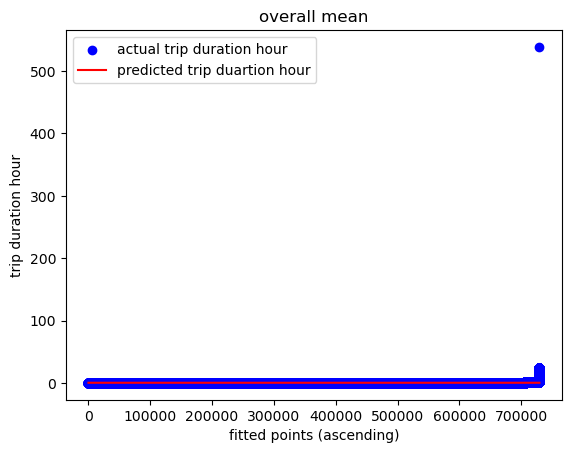

In [30]:
plt.figure(dpi=100)
k = range(0,len(df))
plt.scatter(k,df["trip_duration_hour"].sort_values(),color ='blue',label='actual trip duration hour')
plt.plot(k,df['trip_duration_hour_mean'].sort_values(),color = 'red',label='predicted trip duartion hour')
plt.xlabel("fitted points (ascending)")
plt.ylabel("trip duration hour")
plt.title("overall mean")
plt.legend()

In [31]:
#The above plot depicts that predicted and actual values of trip duration are almost equal

In [32]:
from sklearn.utils import shuffle
df = shuffle(df,random_state=42)
div = int(df.shape[0]/4)
train = df.loc[:3*div+1,:]     #for training data
test = df.loc[3*div+1:]        #for testing data

In [33]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hour,pickup_date,pickup_time_of_day,dropoff_time_of_day,trip_duration_hour_mean
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,N,0.182500,2016-05-21,Morning,Morning,0.264508
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,N,0.054167,2016-01-08,Evening,Evening,0.264508
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,N,0.233333,2016-05-22,Late night,Late night,0.264508
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,N,0.110556,2016-06-11,Morning,Morning,0.264508
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,N,0.189444,2016-04-03,Morning,Morning,0.264508


In [34]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration_hour,pickup_date,pickup_time_of_day,dropoff_time_of_day,trip_duration_hour_mean
546991,id2240736,1,2016-05-25 07:59:16,2016-05-25 08:05:02,1,-73.991364,40.732590,-74.000526,40.742283,N,0.096111,2016-05-25,Morning,Morning,0.264508
43126,id1423404,1,2016-01-18 12:17:13,2016-01-18 12:21:13,2,-73.966225,40.768059,-73.967606,40.763073,N,0.066667,2016-01-18,Afternoon,Afternoon,0.264508
641450,id1317268,2,2016-03-02 18:39:01,2016-03-02 18:50:12,1,-73.994926,40.766018,-74.004219,40.742523,N,0.186389,2016-03-02,Evening,Evening,0.264508
611380,id3335546,1,2016-04-06 19:17:20,2016-04-06 19:18:03,1,-73.974388,40.793781,-73.976006,40.792339,N,0.011944,2016-04-06,Evening,Evening,0.264508
62690,id2174190,2,2016-06-21 18:35:31,2016-06-21 18:40:56,3,-73.963440,40.798557,-73.979736,40.777878,N,0.090278,2016-06-21,Evening,Evening,0.264508


In [38]:
#Calculating RMSE
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
trip_mean_error = sqrt((mse(test['trip_duration_hour'],test['trip_duration_hour_mean'])))
trip_mean_error

0.8904067655425832

In [39]:
pickup = pd.pivot_table(train,values = 'trip_duration_hour',index = ['pickup_time_of_day'],aggfunc = np.mean)
pickup

,trip_duration_hour
pickup_time_of_day,
Afternoon,0.291531
Evening,0.264078
Late night,0.255589
Morning,0.250610


In [40]:
test['pickup'] = 0
for i in train['pickup_time_of_day'].unique():
    test['pickup'][test['pickup_time_of_day'] == str(i)] = train['trip_duration_hour'][train['pickup_time_of_day'] == str(i)].mean()

In [41]:
#RMSE 
pickup_error = sqrt(mse(test['trip_duration_hour'],test['pickup']))
pickup_error

0.8903816016040094

In [42]:
#trip duration mean wrt the mean of dropoff time of the day
dropoff = pd.pivot_table(train,values='trip_duration_hour',index = ['dropoff_time_of_day'],aggfunc = np.mean)
dropoff

,trip_duration_hour
dropoff_time_of_day,
Afternoon,0.284258
Evening,0.269666
Late night,0.256343
Morning,0.247905


In [43]:
# initializing new column to zero
test['dropoff'] = 0

# For every unique entry in pickup latitude
for i in train['dropoff_time_of_day'].unique():
  # Assign the mean value corresponding to unique entry
  test['dropoff'][test['dropoff_time_of_day'] == str(i)] = train['trip_duration_hour'][train['dropoff_time_of_day'] == str(i)].mean()

In [46]:
dropoff_error = sqrt(mse(test['trip_duration_hour'],test['dropoff']))
dropoff_error

0.8903865469170373

In [47]:
#The pickup time error is same as dropoff time error

In [48]:
##trip duration mean with respect to the mean of passenger count
pass_count = pd.pivot_table(train, values='trip_duration_hour', index = ["passenger_count"], aggfunc=np.mean)
pass_count

,trip_duration_hour
passenger_count,
0,0.092981
1,0.255343
2,0.277822
3,0.287332
4,0.285759
5,0.299641
6,0.300193


In [49]:
# initializing new column to zero
test['pass_count'] = 0

# For every unique entry in passenger count
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['pass_count'][test['passenger_count'] == str(i)] = train['trip_duration_hour'][train['passenger_count'] == str(i)].mean()

In [50]:
pass_count_error = sqrt(mse(test['trip_duration_hour'] , test['pass_count'] ))
pass_count_error

0.9290781075032716

In [51]:
#The pass count error is more than both pickup and dropoff error 

In [52]:
store_and_fwd = pd.pivot_table(train, values='trip_duration_hour', index = ["store_and_fwd_flag"], aggfunc=np.mean)
store_and_fwd

,trip_duration_hour
store_and_fwd_flag,
N,0.264109
Y,0.304058


In [53]:
# initializing new column to zero
test['store_and_fwd'] = 0

# For every unique entry in pickup latitude
for i in train['store_and_fwd_flag'].unique():
  # Assign the mean value corresponding to unique entry
  test['store_and_fwd'][test['store_and_fwd_flag'] == str(i)] = train['trip_duration_hour'][train['store_and_fwd_flag'] == str(i)].mean()

In [54]:
str_and_fwd_error = sqrt(mse(test['store_and_fwd'] , test['trip_duration_hour'] ))
str_and_fwd_error

0.8904020727484228

In [55]:
combo = pd.pivot_table(train, values = 'trip_duration_hour', index = ['passenger_count','pickup_time_of_day','dropoff_time_of_day'], aggfunc = np.mean)
combo

trip_duration_hour
passenger_count pickup_time_of_day dropoff_time_of_day                    
0               Afternoon          Afternoon                      0.305417
                Evening            Evening                        0.054352
                                   Late night                     0.106944
                Late night         Late night                     0.023856
                Morning            Afternoon                      0.432222
...                                                                    ...
6               Late night         Late night                     0.282054
                                   Morning                        0.313738
                Morning            Afternoon                      0.376369
                                   Late night                    16.731944
                                   Morning                        0.267228

[75 rows x 1 columns]

In [ ]:
# conclusions
#* THe error of simple mean of trip duration hour is 0.89040676 which is also equal to rmse of dropp time and pickup time of the day   where as the str_fwd_error is 0.89040207 there is only slightly deferrence and 
#* The rmse of passanger count is little high 0.92907810

#* The pickup time error , dropoff time error and pass_count error  0.89040676  
